# Recognize Cat Images from Dog Images using Logistic Regression 

### Data
Microsoft dataset from Kaggle competition: https://www.microsoft.com/en-us/download/details.aspx?id=54765
there are about 12500 in each dataset. 


### Steps 

1. Import Libraries
2. Import and Process Data

        - Load and Resize images (image sizes are different) - make them all square(400 x 400)
3. Split and Feature shaping

        - Add label
        - Split data into train and test
        - Combine dog and cat train images into one numpy array
        - Combine dog and cat test images into one numpy array
4. Define and Initialize Variables (w, b)
5. develop model
    

# 1- Import Libraries

In [154]:
# from PIL import Image
# from scipy import ndimage

In [2]:
# pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import os
import time

import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import rcParams

%matplotlib inline

# 2- Import Images and Process Data

In [2]:
def squareImage(img):
    '''This function adds padding to the shortest sides of an image '''
    x,y,z = img.shape

    # d is the longest side
    d = 0
    if x>y:
        d=x
    else:
        d=y
    
    # create a new white image
    result = np.full((d, d, z), (255,255,255), dtype=np.uint8)
    
    x = int((d - len(img[0]))/2)
    y = int((d - len(img))/2)
    
    # copy img on the new image( result )
    result[y:y+len(img), x:x+len(img[0])] = img
    return result
   
    
# # Example how it works
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(cat1)    
# ax[1].imshow(squareImage(cat1))

### LoadImageFiles 

In [3]:
def loadImageFiles(size):
    '''This function calls squareImage, resize all images (size x size) and 
        then it returns two Python Lists each for each group(Cats and Dogs) 
        Each line of the lists will have a pet image with the shape of (400, 400, 3)'''
    
    path = "data/PetImages/"
    pets = ['Cat/', 'Dog/']
    
    # list of numpy arrays
    catsList = []
    dogsList = []
    
    start = time.time()
    
    for pet in pets:
        petPath = os.path.join(path,pet)
        files = os.listdir(petPath)
        
        for file in files[:10030]:
            try:
                #  Square images
                p = squareImage(cv2.imread(os.path.join(petPath,file)))
                #  resize images by (size x size)
                p = cv2.resize(p, (size, size), interpolation = cv2.INTER_AREA)
                if pet=='Cat/':
                    
                    catsList.append(p)
                else:
                    dogsList.append(p)
                    
            except Exception as e:
                pass

    finish = time.time()
    print("Time to load data: {}".format(finish-start))
    
    return catsList, dogsList

size = 400
catsList, dogsList = loadImageFiles(size)

Time to load data: 90.24004626274109


In [4]:
print(len(catsList), len(dogsList))

10014 10003


### Display 10 Sample Images

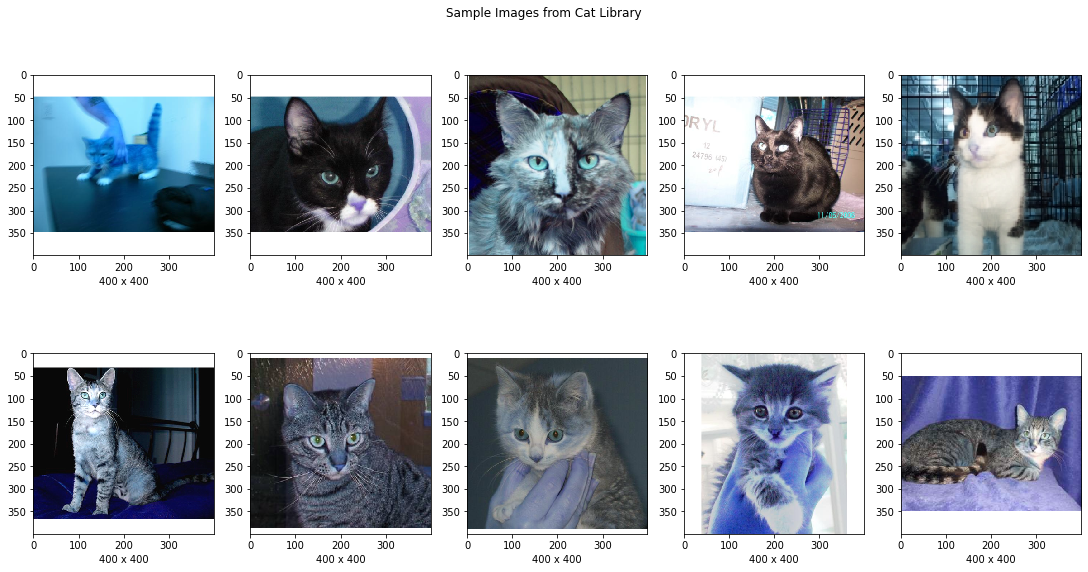

In [7]:
def displayImages(imgList):
    ''' This function creates a 2 x 5 canvas''' 
    
    # These two options of sharing x or y will strech images: sharex=True, sharey=True
    fig, ax = plt.subplots(2,5, figsize=(15,8), constrained_layout=True)  
    fig.suptitle('Sample Images from Cat Library')
    
    # this only works with python > 3.7
    # fig.supxlabel("Image Dimension") 
    fig.align_xlabels()  # it is cutting images

    for i,v in enumerate(imgList[:10]):

        ax[i%2,i%5].imshow(v, interpolation='none')
        label = str(len(v)) + " x " + str(len(v[0]))
        ax[i%2,i%5].set_xlabel(label)
    
    plt.show()

    
displayImages(catsList)

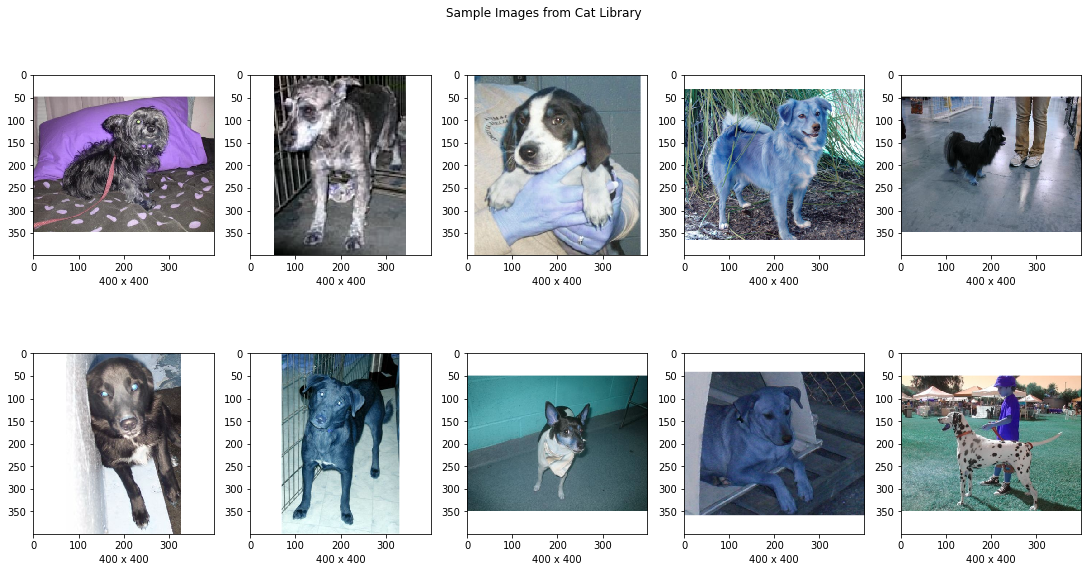

In [8]:
displayImages(dogsList)

In [5]:
# Convert both data lists into numpy array
cats = np.stack(catsList[:10000])
dogs = np.stack(dogsList[:10000])

# Clear Memory

In [6]:
import gc

In [7]:
del catsList
del dogsList
gc.collect()

4

In [8]:
print(cats.shape, dogs.shape)

(10000, 400, 400, 3) (10000, 400, 400, 3)


# 3- Split and Reshape Data

### Split Train set for both Dogs and Cats

In [9]:
X_train_cats = cats[100:]
X_train_dogs = dogs[100:]

print(X_train_cats.shape, X_train_dogs.shape)

(9900, 400, 400, 3) (9900, 400, 400, 3)


### Split Test set for both Dogs and Cats

In [10]:
X_test_cats = cats[:100]
X_test_dogs = dogs[:100]

print(X_test_cats.shape, X_test_dogs.shape)

(100, 400, 400, 3) (100, 400, 400, 3)


In [11]:
# Clear Memory
del cats
del dogs
gc.collect()

0

### Create Label: for both train and test sets (Dogs and Cats )

In [12]:
# cat (y=1) or dog (y=0)
y_train_cats = np.ones((len(X_train_cats),1))
y_train_dogs = np.zeros((len(X_train_dogs),1))

y_test_cats = np.ones((len(X_test_cats),1))
y_test_dogs = np.zeros((len(X_test_dogs),1))

In [13]:
print(y_train_cats.shape, y_train_dogs.shape, y_test_cats.shape, y_test_dogs.shape)

(9900, 1) (9900, 1) (100, 1) (100, 1)


### Concatanate cats and dogs into one train and test sets

In [14]:
X_train = np.concatenate((X_train_cats, X_train_dogs),axis=0)
X_test = np.concatenate((X_test_cats, X_test_dogs),axis=0)

Y_train = np.concatenate((y_train_cats, y_train_dogs),axis=0).T
Y_test = np.concatenate((y_test_cats, y_test_dogs),axis=0).T

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(19800, 400, 400, 3) (200, 400, 400, 3) (1, 19800) (1, 200)


In [15]:
print(Y_train.shape,Y_test.shape)

(1, 19800) (1, 200)


In [16]:
# Clear Memory
del X_train_cats
del X_train_dogs
del X_test_cats
del X_test_dogs
del y_train_cats
del y_train_dogs
del y_test_cats
del y_test_dogs
gc.collect()

0

In [17]:
# m is number of training examples
m_train = X_train.shape[0]
m_test = X_test.shape[0]

In [18]:
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Image Height/Width: size = " + str(size))
print ("Image size: (" + str(size) + ", " + str(size) + ", 3)")

Number of training examples: m_train = 19800
Number of testing examples: m_test = 200
Image Height/Width: size = 400
Image size: (400, 400, 3)


In [19]:
print ("x train set shape: " + str(X_train.shape))
print ("y train set shape: " + str(Y_train.shape))
print ("x test set shape: " + str(X_test.shape))
print ("y test set  shape: " + str(Y_test.shape))

x train set shape: (19800, 400, 400, 3)
y train set shape: (1, 19800)
x test set shape: (200, 400, 400, 3)
y test set  shape: (1, 200)


# Reshape and Standardize data set

#### Reshape images of shape (size, size, 3) in a numpy-array of shape (size ∗ size ∗ 3, 1)

In [20]:
# Reshape the training and test examples

x_temp = X_train.reshape(X_train.shape[1]*X_train.shape[2]*X_train.shape[3], X_train.shape[0])
x_train = x_temp/255
del x_temp
gc.collect()

0

In [21]:
xt_temp = X_test.reshape(X_test.shape[1]*X_test.shape[2]*X_test.shape[3], X_test.shape[0])
x_test = xt_temp/255
del xt_temp
gc.collect()

0

In [22]:
print ("x train set shape: " + str(x_train.shape))
print ("y train set shape: " + str(Y_train.shape))
print ("x test set shape: " + str(x_test.shape))
print ("y test set  shape: " + str(Y_test.shape))

x train set shape: (480000, 19800)
y train set shape: (1, 19800)
x test set shape: (480000, 200)
y test set  shape: (1, 200)


In [23]:

def sigmoid(z):
    s = 1/(1+ np.exp(-z))
    return s

# 5- Define Cost Function

In [24]:
def costFunction(W, B, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(W.T,X) + B)
    cost = np.sum(((-np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m
    
    assert(dw.shape == W.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost, dw, db 


# 6- Optimize W and B using Gradient Descent 

In [25]:
def optimize(W, B, X, Y, alpha, iterations):
    
    costs = []
    for i in range(iterations):

        cost, dw, db = costFunction(W, B, X, Y)
        W = W - (alpha * dw)
        B = B - (alpha * db)
        
#         if i % 50 == 0:
        costs.append(cost)
        
        if i % 100 == 0:
            print("Cost after iteration {} is: {} ".format(i, cost))
            
    return W, B, costs       
        
        

# 7- Predict function

In [26]:
def predict(W, B, X):
    
    m = X.shape[1]
    Y_hat = np.zeros((1,m))
    W = W.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(W.T,X) + B)
    
    # if A >= 0.5 => (True = 1) * 1
    Y_hat = (A >= 0.5) * 1.0
    
    assert(Y_hat.shape == (1, m))
    
    return Y_hat

# 8- Implement Logistic Regression Model

In [33]:
def LRmodel(X, Y, Xtest, Ytest, alpha=0.01, iterations=100):
    
    start = time.time()
    
    # initialize parameters with 0
    w = np.zeros((X.shape[0],1))
    b = 0

    # check if the shape is correct
    assert(w.shape == (X.shape[0], 1))

    W, B, costs = optimize(w, b, X, Y, alpha, iterations)
    
    Y_prediction_train = predict(W, B, X)
    Y_prediction_test = predict(W, B, Xtest)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Ytest)) * 100))
    
    finish = time.time()
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : W, 
         "b" : B,
         "learning_rate" : alpha,
         "iterations": iterations,
         "training_time": finish-start}
    
    return d

In [34]:
print(x_train.shape, Y_train.shape, x_test.shape, Y_test.shape, m_train)

(480000, 19800) (1, 19800) (480000, 200) (1, 200) 19800


In [ ]:
result = LRmodel(x_train, Y_train, x_test, Y_test, alpha=0.01, iterations=100)

Cost after iteration 0 is: 0.6931471805599453 


c:\users\jooni\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\jooni\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


# Practice Code

<hr style="border:2px solid #5e22ff">

In [37]:
def loadSampleImageFiles(size):
    '''This function calls squareImage, resize all images (size x size) and 
        then it returns two Python Lists each for each group(Cats and Dogs) '''
    
    petPath = "data/PetImages/Dog/" 
    files = os.listdir(petPath)

    #  create an empty numpy array
    dogsList = []
    
        
    for file in files[:1]:
        try:
            #  Square images
            p = squareImage(cv2.imread(os.path.join(petPath,file)))

            #  resize images by (size x size)
            p = cv2.resize(p, (size, size), interpolation = cv2.INTER_AREA)
            
            # re
            dogsList.append(p)
                    
        except Exception as e:
            pass
    
    return dogsList

size = 400

L = loadSampleImageFiles(size)
# print("List = {} ".format(L))
# Using np.stack you can convert a list of numpy array to numpy array

d = np.stack(L)
# print("numpy array = {} ".format(d))

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [40]:
d_f = d.reshape(-1)
# print("Flatten Numpy = {} ".format(d_f))
print(d_f.shape ,  (d_f.T).shape)

(480000,) (480000,)


In [41]:
d_ff = d.reshape(d.shape[0],-1)
# print("Flatten Numpy = {} ".format(d_f))
print(d_ff.shape ,  (d_ff.T).shape)

(1, 480000) (480000, 1)


In [33]:
print(dList[0][0])   # one image
print(dList.shape, dList[0].shape, dList[0][0].shape, dList[0][0][0].shape) 

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]
(5, 400, 400, 3) (400, 400, 3) (400, 3) (3,)


## Sample Code: Images are 3D python list (H x W x RGB)


Height of image = 375
Width of image = 500
RGB values = 3


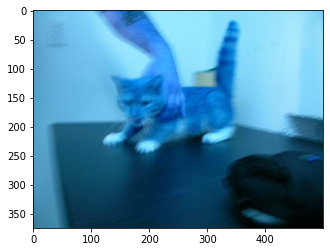

In [171]:
#  each image is a 3 dimentional list: Height x Width x RGB(3 values)
cat1 = catsList[0]
print("\nHeight of image = {}\nWidth of image = {}\nRGB values = {}".format(len(cat1), len(cat1[0]), len(cat1[0][0])))
plt.imshow(cat1)

## How to Convert list to np array

In [172]:
# imageList = [image, image]
# imageNP = np.array(imageList)
# imageNP.shape

## Sample Code: How to Strech Images

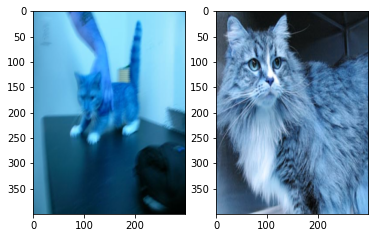

In [163]:
cat3 = cv2.resize(cat1, (300, 400), interpolation = cv2.INTER_AREA)
cat4 = cv2.resize(cat2, (300, 400), interpolation = cv2.INTER_AREA)
fig, ax = plt.subplots(1,2)
ax[0].imshow(cat3)
ax[1].imshow(cat4)

## Sample Code: How to Crop Images

100 400


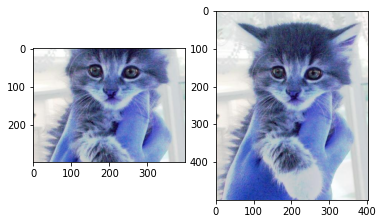

In [22]:
# crop images to become 300, 400
h2b = int((h2 - 300)/2)
h2e = h2b + 300

w2b = int((w2 - 400)/2)
w2e = w2b + 400
print(h2b, h2e)
# [rows, columns]
c2 = cat2[h2b: h2e, w2b: w2e] 
c2.shape

fig, ax = plt.subplots(1,2)
ax[0].imshow(c2)
ax[1].imshow(cat2)